# 주요 모듈

## scipy

- integrate : 수치적분, 미분 방정식
- linalg : 선형대수, 매트릭스 분해
- optimize : 함수 최적화
- signal : 신호 관련
- sparse : 희소 행렬, 희소 선형 시스템
- stats : 통계 분석

## scipy.stats
- T-test
    - ttest_1samp : 단일표본 t검정
    - ttest_ind : 독립표본 t검정
    - ttest_rel : 대응표본 t검정
- 비모수 검정
    - mannwhitneyu : 맨-휘트니 U 검정 (독립 표본 정규성 검정 만족 X시)
    - ranksums : 윌콕슨 순위합 검정 (독립 표본 정규성 검정 만족 X시)
    - wilcoxon : 윌콕슨 부호 순위합 검정
- 정규성 검정
    - anderson : Anderson-Darling, 데이터수가 상대적으로 많을 때
    - kstest : kolmogorov-smirnov, 데이터수가 상대적으로 많을 때
    - mstats.normaltest
    - shapiro : shapiro, 노말분포 가장 엄격하게 검정, 데이터수가 상대적으로 적을 때
- 등분산 검정
    - bartlett
    - fligner
    - levene
- 카이제곱 검정
    - chi2_contigency : 카이제곱 독립성 검정
    - chisquare : 카이제곱 적합도 검정
    - fisher_exact : 피셔 정확 검정, 빈도수가 5개 이하 셀의 수가 전체 셀의 20%이상일 경우 사용
- ANOVA
    - f_oneway

# 정규성 검정 

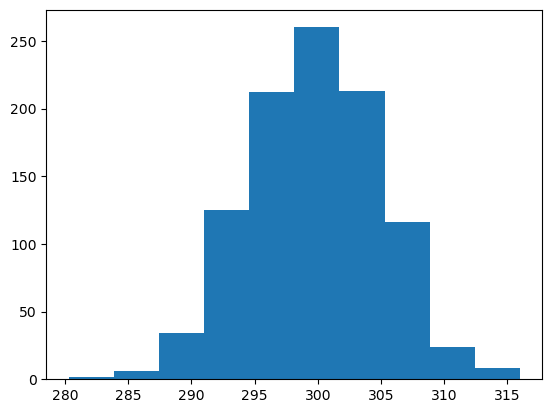

In [1]:
# Question 1 : 다음 데이터의 정규성을 검증하라.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
plt.hist(df)
plt.show()

In [2]:
from scipy.stats import shapiro
print(shapiro(df))

ShapiroResult(statistic=0.9981444478034973, pvalue=0.34849318861961365)


유의수준 0.05에 대해 귀무가설을 기각하지 못하므로 데이터는 정규성을 만족한다.

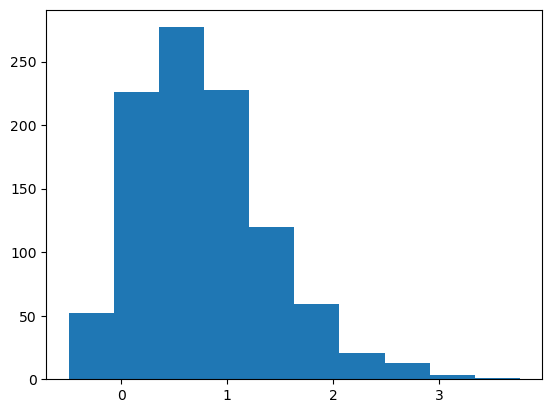

In [3]:
# Question 2 : 다음 데이터의 정규성을 검정하라.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

In [4]:
from scipy.stats import shapiro
print(shapiro(df))

ShapiroResult(statistic=0.9578885436058044, pvalue=2.309641794969743e-16)


유의수준 0.05에 대해 귀무가설을 기각하고 대립가설을 채택하기 때문에 데이터는 정규성을 가지지 않는다.

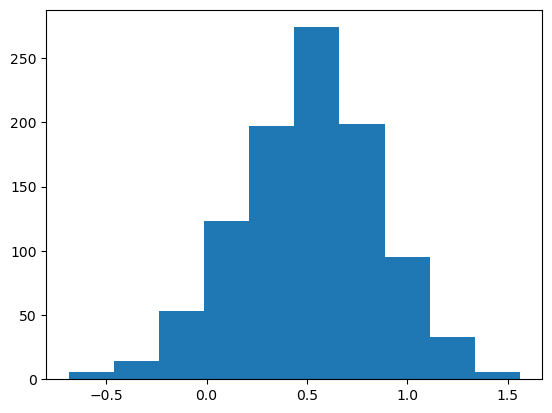

In [5]:
# Question 3 : 위의 데이터를 log 변환한 후에 정규성을 가지는지 확인하라.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
log_y_data = np.log1p(df)
plt.hist(log_y_data)
plt.show()

In [6]:
from scipy.stats import shapiro
print(shapiro(log_y_data))

ShapiroResult(statistic=0.9976889491081238, pvalue=0.17540602385997772)


유의수준 0.05에 대해 귀무가설을 기각하지 못하므로 데이터는 정규성을 만족한다.

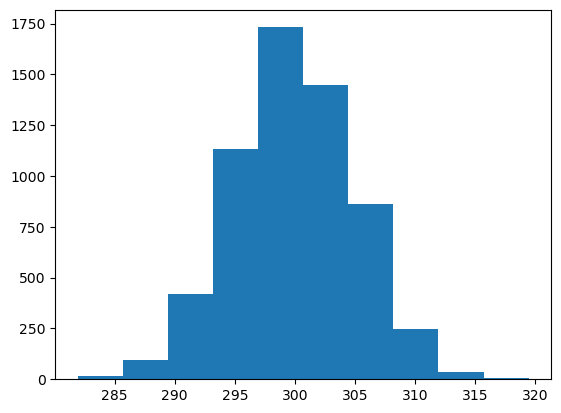

In [7]:
# Question 4 : 다음 데이터의 정규성을 검증하라.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
plt.hist(df)
plt.show()

In [8]:
from scipy.stats import shapiro
print(shapiro(df))

ShapiroResult(statistic=0.9995355606079102, pvalue=0.1507067084312439)


/home/jeong/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


유의수준 0.05에 대해 귀무가설을 기각하지 못하므로 데이터는 정규성을 만족한다.

# 단일 표본 t검정

1. 정규성 검정(from scipy.stats import shapiro)의 귀무가설을 기각
    - 윌콕슨 부호 순위 검정(from scipy.stats import wilcoxon) 시행
2. 정규성 검정의 귀무가설을 기각하지 못함
    - 단일표본 t검정 시행(from scipy.stats import ttest_1samp) 시행

In [9]:
# Question 1 : 100명의 키 정보가 들어있는 데이터가 있다. 데이터가 정규성을 만족하는지 확인하라. 그리고 평균키는 165라 판단할 수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')

In [10]:
from scipy.stats import ttest_1samp, shapiro, wilcoxon
static, pvalue = shapiro(df)
print(f"샤피로 정규성 검정 결과 p-value는 {pvalue} 이므로,")
if pvalue < 0.05 :
    print(f"귀무가설을 기각한다. 따라서 데이터는 정규성을 만족하지 못하므로 비모수 검정인 윌콕순 순위 부호 검정을 시행한다.")

    static, pvalue = wilcoxon(df['height'] - 165)
    if pvalue < 0.05 :
        print(f"귀무가설을 기각한다. 따라서 데이터는 평균이 165라고 판단할 수 있다.")
    else :
        print(f"귀무가설을 기각하지 못하므로, 데이터는 평균이 165라고 판단할 수 없다.")
else :
    print(f"귀무가설을 기각하지 못한다. 따라서 데이터는 정규성을 만족하므로 단일표본 t검정을 시행한다.")

    static, pvalue = ttest_1samp(df['height'], 165)
    if pvalue < 0.05 :
        print(f"귀무가설을 기각한다. 따라서 데이터는 평균이 165라고 판단할 수 있다.")
    else :
        print(f"귀무가설을 기각하지 못하므로, 데이터는 평균이 165라고 판단할 수 없다.")

샤피로 정규성 검정 결과 p-value는 0.4558176100254059 이므로,
귀무가설을 기각하지 못한다. 따라서 데이터는 정규성을 만족하므로 단일표본 t검정을 시행한다.
귀무가설을 기각한다. 따라서 데이터는 평균이 165라고 판단할 수 있다.


In [11]:
# Question 2 : 100명의 키 정보가 들어있는 데이터가 있다. 데이터가 정규성을 만족하는지 확인하라. 그리고 평균키는 165라 판단할 수 있는지 귀무가설과 대립가ㄹ을 설정한 후 유의수준 5%로 검정하라.
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height2.csv')
from scipy.stats import ttest_1samp
from scipy.stats import shapiro
from scipy.stats import wilcoxon
statistic, pvalue = shapiro(df)
print(f'샤피로 정규성 검정의 p-value는 {pvalue} 이므로,')
if pvalue < 0.05 :
    print('귀무가설을 기각한다. 따라서 데이터는 정규성을 만족하지 않으므로 비모수 검정인 윌콕슨 순위 부호 검정을 진행한다.')

    # 윌콕슨 부호 순위 검정
    statistic, pvalue = wilcoxon(df['height'] - 165)

    if pvalue < 0.05 :
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하고 대립가설을 채택한다.')
    else :
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하지 않는다.')
else :
    print('귀무가설을 기각하지 못하므로 데이터는 정규성을 만족한다. 따라서 단일 표본 t검정을 시행한다.')

    # 단일표본 t검정
    statistic, pvalue = ttest_1samp(df['height'], 165)
    if pvalue < 0.05 :
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하고 대립가설을 채택한다.')
    else :
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하지 않는다.')

샤피로 정규성 검정의 p-value는 0.013552471995353699 이므로,
귀무가설을 기각한다. 따라서 데이터는 정규성을 만족하지 않으므로 비모수 검정인 윌콕슨 순위 부호 검정을 진행한다.
검정 결과 pvalue는 0.04880534424649582로 결과는 귀무가설을 기각하고 대립가설을 채택한다.


# 등분산 검정

In [12]:
# Question 1 : 두개 학급의 시험성적에 대한 데이터이다. 그룹간 등분산 검정을 시행하라.
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy2.csv')
df.head()

,class,score
0,A,84
1,A,59
2,A,49
3,A,57
4,A,82


In [13]:
from scipy.stats import bartlett, fligner, levene
a = df[df['class'] == 'A'].score
b = df[df['class'] == 'B'].score
print(bartlett(a, b))
print(fligner(a, b, center = 'median'))
print(fligner(a, b, center = 'mean'))
print(levene(a, b, center = 'median'))
print(levene(a, b, center = 'mean'))

BartlettResult(statistic=0.26035880448930865, pvalue=0.609873758447687)
FlignerResult(statistic=0.7281251154135562, pvalue=0.39349158741002765)
FlignerResult(statistic=0.8272211734319945, pvalue=0.36307728836821906)
LeveneResult(statistic=0.3145466542912649, pvalue=0.5751662820554713)
LeveneResult(statistic=0.5086970687685527, pvalue=0.4760514837800255)


In [14]:
# Question 2 : 두개 학급의 시험성적에 대한 데이터이다. 등분산 검정을 시행하라.
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy3.csv')
df.head()
from scipy.stats import bartlett, fligner, levene
a = df[df['class'] == 'A'].score
b = df[df['class'] == 'B'].score
print(bartlett(a, b))
print(fligner(a, b, center = 'median'))
print(fligner(a, b, center = 'mean'))
print(levene(a, b, center = 'median'))
print(levene(a, b, center = 'mean'))

BartlettResult(statistic=1.5116783794562305, pvalue=0.2188831590902503)
FlignerResult(statistic=4.960366756026232, pvalue=0.025934706256615564)
FlignerResult(statistic=4.94724457924667, pvalue=0.026132286002684912)
LeveneResult(statistic=4.307122424591436, pvalue=0.03848734007752694)
LeveneResult(statistic=4.342327020297874, pvalue=0.0377066528874248)


In [15]:
# Question 3 : 두개 학급의 시험성적에 대한 데이터이다. 그룹간 동분산 검정을 시행하라.
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy6.csv')
df.head()
from scipy.stats import bartlett, fligner, levene
a = df['A']
b = df['B']
print(bartlett(a, b))
print(fligner(a, b, center = 'median'))
print(fligner(a, b, center = 'mean'))
print(levene(a, b, center = 'median'))
print(levene(a, b, center = 'mean'))

BartlettResult(statistic=2.383217881104806, pvalue=0.12264468401742169)
FlignerResult(statistic=5.124831619122788, pvalue=0.023585858890699054)
FlignerResult(statistic=6.08420814282746, pvalue=0.01363954875460099)
LeveneResult(statistic=5.147914610463281, pvalue=0.023868975493455683)
LeveneResult(statistic=5.783103950473267, pvalue=0.016687980542371833)


In [16]:
# Question 4 : 두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라.
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
df.head()
from scipy.stats import bartlett, fligner, levene
a = df['A'].dropna()
b = df['B'].dropna()
print(bartlett(a, b))
print(fligner(a, b, center = 'median'))
print(fligner(a, b, center = 'mean'))
print(levene(a, b, center = 'median'))
print(levene(a, b, center = 'mean'))

BartlettResult(statistic=3.024072692680794, pvalue=0.08203720607748438)
FlignerResult(statistic=7.710320541528441, pvalue=0.005490600130793619)
FlignerResult(statistic=7.866701415553152, pvalue=0.005035342411464087)
LeveneResult(statistic=8.008595918808284, pvalue=0.004851565077063284)
LeveneResult(statistic=8.217541809462276, pvalue=0.004331841625789694)


# 독립표본 검정 

1. 데이터가 정규성 검정의 귀무가설을 기각함.
    - 비모수 검정 시행 : mannwhitneyu, ranksums
2. 데이터가 정규성 검정의 귀무가설을 기각하지 못함.(from scipy.stats import shapiro)
    - 등분산 검정 (from scipy.stats import bartlett, fligner, levene)을 기각하지 못할 경우
        - ttest_ind(equal_var = True) 시행
    - 등분산 검정을 기각할 경우
        - ttest_ind(equal_var = False) 시행

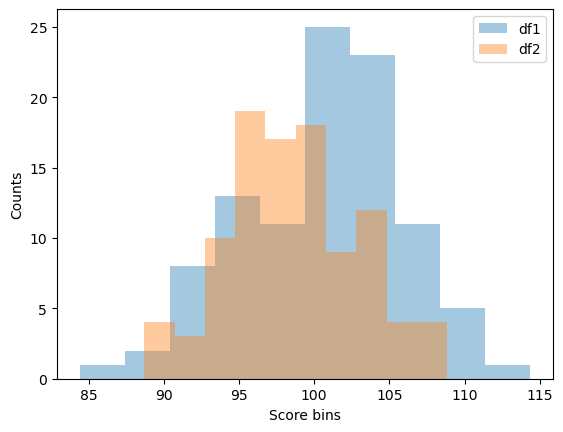

In [17]:
# Question 1 : 두개 학급의 시험성적에 대한 데이터이다. 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인하라.
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind2.csv')
plt.hist(df1,label='df1',alpha=0.4)
plt.hist(df2,label="df2",alpha=0.4)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [18]:
from scipy.stats import shapiro, mannwhitneyu, levene, ttest_ind
# 정규성 검정
static1, pvalue1 = shapiro(df1['data'])
static2, pvalue2 = shapiro(df2['data'])
print(f"샤피로 정규성 검정 시행결과 df1의 pvalue는 {pvalue1} 이고, df2의 pvalue는 {pvalue2} 이다.")
if (pvalue1 < 0.05) & (pvalue2 < 0.05) :
    print(f"귀무가설을 기각하므로 두 그룹은 정규성을 만족하지 못한다.")
    static, pvalue = mannwhitneyu(df1['data'], df2['data'])
else :
    print(f"귀무가설을 기각하지 못하므로 두 그룹은 정규성을 만족한다. 등분산 검정을 시행한다.")
    static, pvalue = levene(df1['data'], df2['data'], center = 'mean')

    if pvalue < 0.05 :
        print(f"귀무가설을 기각하므로 두 그룹은 등분산성을 가지고 있지 않다.")
        static, pvalue = ttest_ind(df1['data'], df2['data'], equal_var = False)
        if pvalue < 0.05 :
            print(f"귀무가설을 기각하므로 두 그룹의 평균은 같지 않다.")
        else :
            print(f"귀무가설을 기각하지 못하므로 두 그룹의 평균은 같다.")
    else :
        print(f"귀무가설을 기각하므로 두 그룹은 등분산성을 가지고 있지않다.")
        static, pvalue = ttest_ind(df1['data'], df2['data'], equal_var = True)
        if pvalue < 0.05 :
            print(f"귀무가설을 기각하므로 두 그룹의 평균은 같지 않다.")
        else :
            print(f"귀무가설을 기각하지 못하므로 두 그룹의 평균은 같다.")

샤피로 정규성 검정 시행결과 df1의 pvalue는 0.379673033952713 이고, df2의 pvalue는 0.6793646216392517 이다.
귀무가설을 기각하지 못하므로 두 그룹은 정규성을 만족한다. 등분산 검정을 시행한다.
귀무가설을 기각하므로 두 그룹은 등분산성을 가지고 있지않다.
귀무가설을 기각하므로 두 그룹의 평균은 같지 않다.


In [19]:
from scipy.stats import shapiro
print(shapiro(df1))
print(shapiro(df2))
# 두 그룹다 정규성 검정의 귀무가설을 기각하지 못하므로 정규성을 가지고 있다.
from scipy.stats import levene
print(levene(df1['data'], df2['data']))
# 유의수준 0.05에서 귀무가설을 기각하지 못하므로 등분산을 가지고 있다.
from scipy.stats import ttest_ind
print(ttest_ind(df1['data'], df2['data']))

ShapiroResult(statistic=0.9860946536064148, pvalue=0.379673033952713)
ShapiroResult(statistic=0.990182638168335, pvalue=0.6793646216392517)
LeveneResult(statistic=2.5337683795339547, pvalue=0.11302904824469093)
Ttest_indResult(statistic=2.7671907368517195, pvalue=0.00619015106792926)


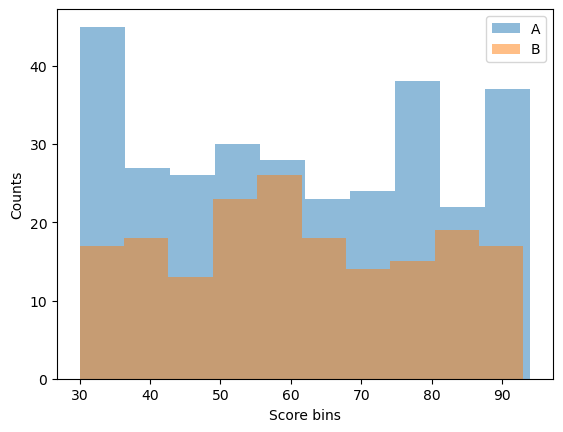

In [20]:
# Question 2 : 두개 학급의 시험성적에 대한 데이터이다. 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인하라.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
plt.hist(df['A'],alpha=0.5,label='A')
plt.hist(df['B'].dropna(),alpha=0.5,label="B")
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [21]:
from scipy.stats import shapiro
print(shapiro(df['A']))
print(shapiro(df['B'].dropna()))
# 정규성 검정 결과 귀무가설을 기각하므로 두 그룹다 정규성을 만족하지 못한다.
from scipy.stats import mannwhitneyu, ranksums
print(mannwhitneyu(df['A'], df['B'].dropna()))
print(ranksums(df['A'], df['B'].dropna()))

ShapiroResult(statistic=0.93753981590271, pvalue=6.175894240456614e-10)
ShapiroResult(statistic=0.9639433026313782, pvalue=0.00013568344002123922)
MannwhitneyuResult(statistic=27036.0, pvalue=0.9807458376150018)
RanksumsResult(statistic=0.02446942170858557, pvalue=0.9804781743503561)


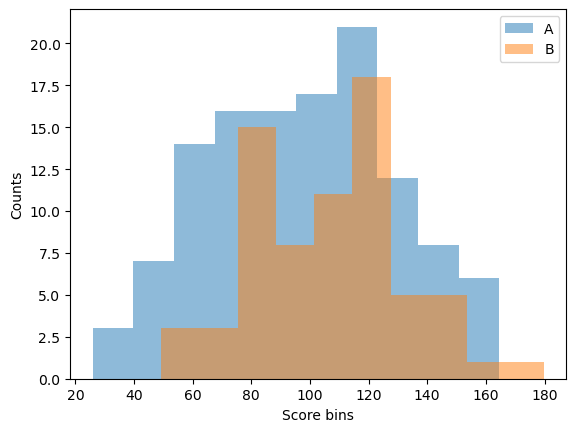

In [22]:
# Question 3 : 두개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균을 동일하다 말할 수 있는지 검정하라.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind3.csv')
plt.hist(df[df['group'] =='a'].data,label='A',alpha=0.5)
plt.hist(df[df['group'] =='b'].data,label="B",alpha=0.5)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [23]:
# 정규성 검정
from scipy.stats import shapiro
a = df[df['group'] == 'a'].data
b = df[df['group'] == 'b'].data
print(shapiro(a))
print(shapiro(b))
# 두 그룹다 정규성 검정의 귀무가설을 기각하지 못하므로 정규성을 가지고 있다.
# 등분산 검정
from scipy.stats import bartlett
print(bartlett(a, b))
print(bartlett(a, b))
# 등분산 검정의 결과 귀무가설을 기각하므로 두 그룹의 분산은 서로 다르다.
from scipy.stats import ttest_ind
print(ttest_ind(a, b, equal_var = False))
# 독립표본 검정 결과 귀무가을 기각하므로 두 그룹의 평균도 서로 다르다.

ShapiroResult(statistic=0.9834123253822327, pvalue=0.1473984718322754)
ShapiroResult(statistic=0.9831852316856384, pvalue=0.4701973497867584)
BartlettResult(statistic=4.527245852831357, pvalue=0.03335926358531406)
BartlettResult(statistic=4.527245852831357, pvalue=0.03335926358531406)
Ttest_indResult(statistic=-2.1949470315829265, pvalue=0.029512802991767898)


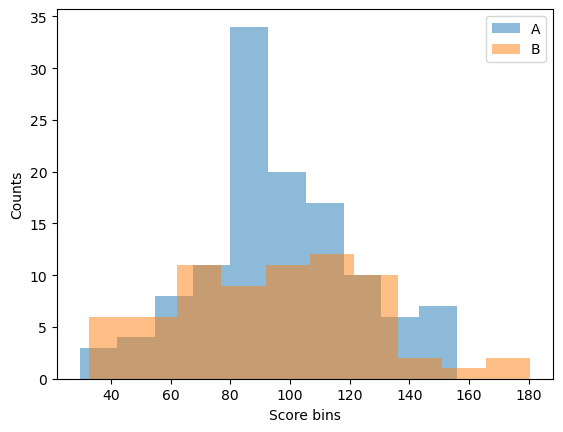

In [24]:
# Question 4 : 두개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind6.csv')
plt.hist(df['a'],alpha=0.5,label='A')
plt.hist(df['b'],alpha=0.5,label="B")
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [25]:
# 정규성 검정
from scipy.stats import shapiro
print(shapiro(df['a']))
print(shapiro(df['b'].dropna()))
# 정규성 검정 결과 : 귀무가설을 기각하지 못하므로 정규성을 만족함.
# 등분산 검정
from scipy.stats import fligner
print(fligner(df['a'], df['b'].dropna(), center = 'median'))
# 등분산 검정 결과 : 귀무가설을 기각하므로 분산이 서로 같음.
# 독립표본 검정
from scipy.stats import ttest_ind
print(ttest_ind(df['a'], df['b'].dropna(), equal_var = False))
# 독립표본 검정 결과 : 귀무가설을 기각하지 못하므로 두 그룹의 평균은 서로 같음.

ShapiroResult(statistic=0.9865895509719849, pvalue=0.28390026092529297)
ShapiroResult(statistic=0.9854326844215393, pvalue=0.5937624573707581)
FlignerResult(statistic=4.387886502894593, pvalue=0.03619515515941132)
Ttest_indResult(statistic=0.0015963310698567184, pvalue=0.9987289046092704)


# 대응표본 t검정 

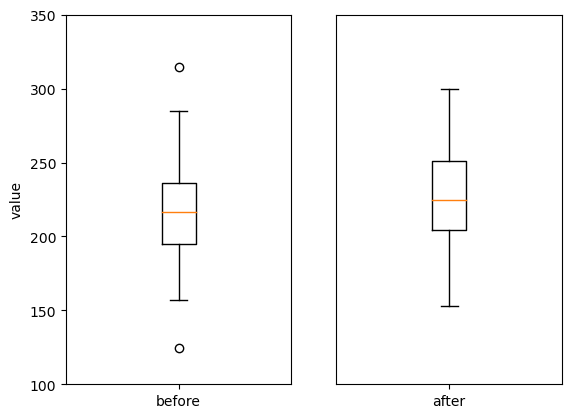

In [26]:
# Question 1 : 특정 질병 집단의 투약 전후의 혈류량 변화를 나타낸 데이터이다. 투약 전후의 변화가 있는지 검정하라.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel2.csv')
fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(100,350)
ax[1].set_ylim(100,350)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [27]:
# 정규성 검정
from scipy.stats import shapiro
before = df['before']
after = df['after']
print(shapiro(before))
print(shapiro(after))
# 정규성 검정 : 귀무가설을 기각하지 못하므로 두 그룹은 정규성이 존재함.
# 등분산 검정
from scipy.stats import levene
print(levene(before, after, center = 'mean'))
# 등분산 검정 : 귀무가설을 기각하므로 분산이 동일함
# 대응표본 검정
from scipy.stats import ttest_rel
print(ttest_rel(before, after))
# 대응포변 검정 : 귀무가설을 기각하므로 투약 전후의 변화가 존재함. 

ShapiroResult(statistic=0.9907895922660828, pvalue=0.6065835952758789)
ShapiroResult(statistic=0.9916961193084717, pvalue=0.6923638582229614)
LeveneResult(statistic=0.07992405348019711, pvalue=0.7776460750812457)
Ttest_relResult(statistic=-2.5535473487670677, pvalue=0.011926744724546513)


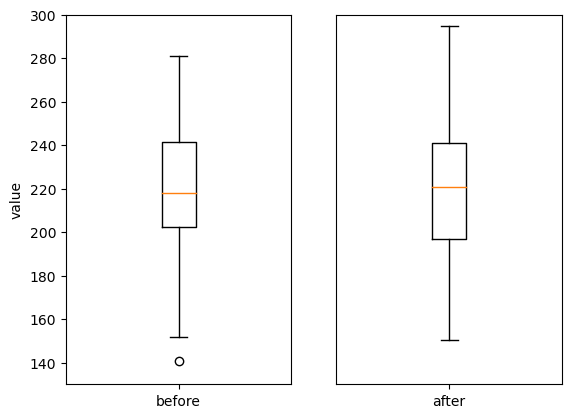

In [28]:
 # Question 2 : 특정 질변 집단의 투약 전후의 혈류량 변화를 나타낸 데이터이다. 투약 전후의 변화가 있는지를 검정하라.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel3.csv')
fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(130,300)
ax[1].set_ylim(130,300)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [29]:
# 정규성 검정
from scipy.stats import shapiro
before = df['before']
after = df['after']
print(shapiro(before))
print(shapiro(after))
# 정규성 검정 : 귀무가설을 기각하지 못하므로 두 그룹은 정규성이 존재함.
# 등분산 검정
from scipy.stats import levene
print(levene(before, after, center = 'mean'))
# 등분산 검정 : 귀무가설을 기각하므로 분산이 동일함
# 대응표본 검정
from scipy.stats import ttest_rel
print(ttest_rel(before, after))
# 대응포변 검정 : 귀무가설을 기각하지 못하므로 투약 전후의 변화가 없음.

ShapiroResult(statistic=0.9920631051063538, pvalue=0.7270199656486511)
ShapiroResult(statistic=0.992019534111023, pvalue=0.7229290008544922)
LeveneResult(statistic=1.321242871013592, pvalue=0.25152289343137324)
Ttest_relResult(statistic=0.188900575991026, pvalue=0.8504925317234707)


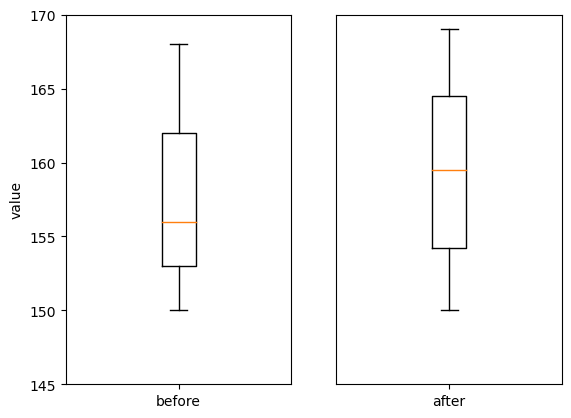

In [30]:
# Question 3 : 특정 집단의 학습 전후 시험 성적 변화를 나타낸 데이터이다. 시험 전과 후에 차이가 있는지 검정하라
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel1.csv')
fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(145,170)
ax[1].set_ylim(145,170)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [31]:
# 정규성 검정
from scipy.stats import shapiro
before = df['before']
after = df['after']
print(shapiro(before))
print(shapiro(after))
# 정규성 검정 : 귀무가설을 기각하므로 정규성을 만족하지 못함.
# 등분산 검정
from scipy.stats import levene
print(levene(before, after, center = 'mean'))
# 등분산 검정 : 귀무가설을 기각하므로 분산이 동일함
# 대응표본 검정
from scipy.stats import wilcoxon
print(wilcoxon(before, after))
# 대응포변 검정 : 귀무가설을 기각하지 못하므로 투약 전후의 변화가 없음.

ShapiroResult(statistic=0.9173730611801147, pvalue=0.0018974003614857793)
ShapiroResult(statistic=0.9448966979980469, pvalue=0.021140215918421745)
LeveneResult(statistic=0.06984409799554578, pvalue=0.7921188945051387)
WilcoxonResult(statistic=437.0, pvalue=0.12098409484052809)


/home/jeong/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


# 카이제곱 검정

1. 일원 카이제곱 검정 (chisquare) : 한개 요인에 의해 K개의 범주를 가질 때 이론적 분포를 따르는지 검정
2. 이원 카이제곱 검정 (chi2_contigency, fisher_exact) : 무집단이 두 개의 변수에 의해 범주화 되었을 때, 두 변수들 사이의 관계가 독립인지 아닌지 검정.

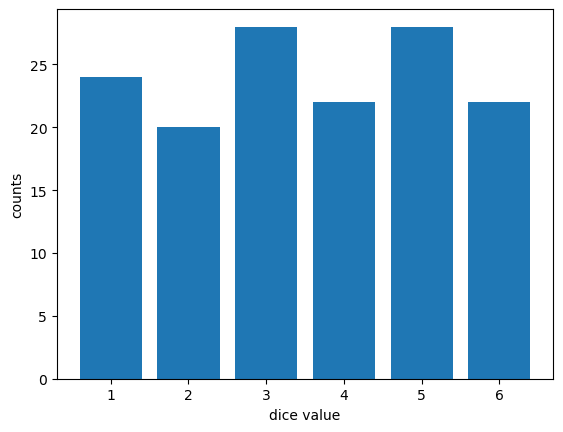

In [32]:
# Question 1 : 144회 주사위를 던졌을때, 각 눈금별로 나온 횟수를 나타낸다. 이 데이터는 주사위의 분포에서 나올 가능성이 있는지 검정하라
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/dice.csv')
plt.bar(df.dice_number,df.counts)
plt.xlabel('dice value')
plt.ylabel('counts')
plt.show()

In [33]:
# 기댓값은 1/6
from scipy.stats import chisquare
df['expected'] = (df['counts'].sum() / 6).astype('int')
print(chisquare(df.counts, df.expected))

Power_divergenceResult(statistic=2.333333333333333, pvalue=0.8013589222076911)


In [35]:
# Question 2 : 다음 데이터는 어떤 집단의 왼손잡이, 오른손 잡이의 숫자를 나타낸다. 인간의 왼손잡이와 오른손잡이의 비율을 0.2:0.8로 알려져있다. 이 집단에서 왼손과 오른손 잡이의 비율이 적합한지 검정하라
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/hands2.csv')
df.head()

,hands
0,right
1,right
2,left
3,right
4,right


In [36]:
target = df.hands.value_counts().to_frame()
target['expected'] = [int(len(df)*0.8), int(len(df)*0.2)]
from scipy.stats import chisquare
print(chisquare(target.hands, target.expected))

Power_divergenceResult(statistic=5.0, pvalue=0.025347318677468325)


In [37]:
# Question 3 : 다음 데이터는 국민 기초체력을 조사한 데이터이다. 성별과 등급이 독립적인지 검정하라
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
df.head()

,측정나이,측정회원성별,신장 : cm,체중 : kg,체지방율 : %,이완기혈압(최저) : mmHg,수축기혈압(최고) : mmHg,악력D : kg,앉아윗몸앞으로굽히기 : cm,교차윗몸일으키기 : 회,제자리 멀리뛰기 : cm,등급
0,59.0,M,175.0,70.6,19.2,91.0,150.0,40.6,12.2,30.0,179.0,C
1,40.0,F,161.4,45.8,21.7,62.0,119.0,22.1,16.0,32.0,165.0,B
2,27.0,M,176.6,84.8,19.2,87.0,153.0,45.9,13.2,61.0,216.0,B
3,38.0,M,167.6,76.7,24.7,63.0,132.0,43.6,16.0,45.0,231.0,A
4,21.0,M,165.2,66.2,21.5,83.0,106.0,33.5,10.6,46.0,198.0,C


In [38]:
cdf = pd.crosstab(df['측정회원성별'], df['등급'])
display(cdf)
from scipy.stats import chi2_contingency
print(chi2_contingency(cdf)[1])

등급,A,B,C,D
측정회원성별,,,,
F,1484,1130,1147,1120
M,1865,2219,2202,2229


7.481892813401677e-26


귀무가설을 기각하므로 측정 회원 성별과 등급은 서로 관련이 있다.

In [39]:
# Question 4 : 성별에 따른 동아리 활동 참석 비율을 나타낸 데이터이다. 성별과 참석간에 관련이 있는지 검정하라
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/fe2.csv',index_col=0)
df

,불참,참석,총합
남성,4,2,6
여성,1,9,10
총합,5,11,16


In [40]:
df = df.iloc[:-1, :-1]
display(df)
from scipy.stats import fisher_exact
print(fisher_exact(df))

,불참,참석
남성,4,2
여성,1,9


(18.0, 0.03571428571428571)


피셔의 정확검정 결과 귀무가설을 기각하지 못하므로 성별과 참석 여부는 관련이 없다.